# Construire et entraîner un perceptron multi-couches - étape par étape

Dans ce TP, vous allez mettre en œuvre l'entraînement d'un réseau de neurones (perceptron multi-couches) à l'aide de la librairie **numpy**. Pour cela nous allons procéder par étapes successives. Dans un premier temps nous allons traiter le cas d'un perceptron mono-couche, en commençant par la passe *forward* de prédiction d'une sortie à partir d'une entrée et des paramètres du perceptron, puis en implémentant la passe *backward* de calcul des gradients de la fonction objectif par rapport aux paramètres. A partir de là, nous pourrons tester l'entraînement à l'aide de la descente de gradient stochastique.

Une fois ces étapes achevées, nous pourrons nous atteler à la construction d'un perceptron multi-couches, qui consistera pour l'essentiel en la composition de perceptrons mono-couche.

Dans ce qui suit, nous adoptons les conventions de notation suivantes :

- $(x, y)$ désignent un couple donnée/label de la base d'apprentissage ; $\hat{y}$ désigne quant à lui la prédiction du modèle sur la donnée $x$.

- L'indice $i$ indique la $i^{\text{ème}}$ dimension d'un vecteur ⇒ $a_i$

- L'exposant $(k)$ désigne un objet associé au $k^{\text{ème}}$ exemple ⇒ $a_i^{(k)}$

- L'exposant $[l]$ désigne un objet associé à la $l^{\text{ème}}$ couche ⇒ $a_i^{(k)[l]}$
   
Exemple:  
- $a_5^{(2)[3]}$ indique donc la $5^{\text{ème}}$ dimension du vecteur d'activation du $2^{\text{ème}}$ exemple d'entraînement (2), de la $3^{\text{ème}}$ couche [3].


Commençons par importer tous les modules nécessaires :

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

# Perceptron mono-couche


### Perceptron mono-couche - passe *forward*

Un perceptron mono-couche est un modèle liant une couche d'entrée (en vert, qui n'effectue pas d'opération) à une couche de sortie. Les neurones des deux couches sont connectés par des liaisons pondérées (les poids synaptiques) $W_{xy}$, et les neurones de la couche de sortie portent chacun un biais additif $b_y$. Enfin, une fonction d'activation $f$ est appliquée à l'issue de ces opérations pour obtenir la prédiction du réseau $\hat{y}$.

On a donc :

$$\hat{y} = f ( W_{xy} x + b_y )$$

On posera pour la suite :
$$ z = W_{xy} x + b_y $$

La figure montre une représentation de ces opérations sous forme de réseau de neurones (à gauche), mais aussi sous une forme fonctionnelle (à droite) qui permet de bien visualiser l'ordre des opérations.

<img src="https://drive.google.com/uc?id=1RZeiaKue0GLXJr3HRtKkuP6GD8r6I1_Q" height=300>
<img src="https://drive.google.com/uc?id=1dnQ6SSdpEX1GDTgoNTrUwA3xjiP9rTYU" height=250>


Notez que les paramètres du perceptron, que nous allons ajuster par un processus d'optimisation, sont donc les poids synaptiques $W_{xy}$ et les biais $b_y$. Par commodité dans le code, nous considérerons également comme un paramètre le choix de la fonction d'activation.

**Remarque importante** : En pratique, on traite souvent les données par *batch*, c'est-à-dire que les prédictions sont faites pour plusieurs données simultanément. Ici pour une taille de *batch* de $m$, cela signifie en fait que :

$$ x \in \mathbb{R}^{4 \times m} \text{  et  } y \in \mathbb{R}^{5 \times m}$$


Complétez la fonction *dense_layer_forward* qui calcule la prédiction  d'un perceptron mono-couche pour une entrée $x$.

**Indication**:
```
La fonction np.matmul permet de réaliser un produit matriciel.

Vous pouvez utiliser la fonction np.maximum pour implémenter l'activation reLU.

```

In [3]:
def dense_layer_forward(x, Wxy, by, activation):
    """
    Réalise une unique étape forward de la couche dense telle que décrite dans la figure précédente

    Arguments:
    x -- l'entrée, tableau numpy de dimension (n_x, m).
    Wxy -- Matrice de poids multipliant l'entrée, tableau numpy de shape (n_y, n_x)
    by -- Biais additif ajouté à la sortie, tableau numpy de dimension (n_y, 1)
    activation -- Chaîne de caractère désignant la fonction d'activation choisie : 'linear', 'sigmoid' ou 'relu'

    Retourne :
    y_pred -- prédiction, tableau numpy de dimension (n_y, m)
    cache -- tuple des valeurs utiles pour la passe backward (rétropropagation du gradient), contient (x, z)
    """



    ### A COMPLETER
    # calcul de z
    z = np.matmul(Wxy, x) + by
    # calcul de la sortie en appliquant la fonction d'activation
    if activation == 'relu':
      y_pred = np.maximum(z, 0)
    elif activation == 'sigmoid':
      y_pred = 1/(1+np.exp(-z))
    elif activation == 'linear':
      y_pred = z
    else:
      print("Erreur : la fonction d'activation n'est pas implémentée.")

    ### FIN

    # sauvegarde du cache pour la passe backward
    cache = (x, z)

    return y_pred, cache

Exécutez les lignes suivantes pour vérifier la validité de votre code :

In [4]:
np.random.seed(1)
x_tmp = np.random.randn(3,10)
Wxy = np.random.randn(2,3)
by = np.random.randn(2,1)

activation = 'relu'
y_pred_tmp, cache_tmp = dense_layer_forward(x_tmp, Wxy, by, activation)
print("y_pred.shape = \n", y_pred_tmp.shape)

print('----------------------------')

print("activation relu : y_pred[1] =\n", y_pred_tmp[1])

print('----------------------------')

activation = 'sigmoid'
y_pred_tmp, cache_tmp = dense_layer_forward(x_tmp, Wxy, by, activation)
print("activation sigmoid : y_pred[1] =\n", y_pred_tmp[1])

print('----------------------------')

activation = 'linear'
y_pred_tmp, cache_tmp = dense_layer_forward(x_tmp, Wxy, by, activation)
print("activation linear : y_pred[1] =\n", y_pred_tmp[1])


y_pred.shape = 
 (2, 10)
----------------------------
activation relu : y_pred[1] =
 [0.         2.11983968 0.88583246 1.39272594 0.         2.92664609
 0.         1.47890228 0.         0.04725575]
----------------------------
activation sigmoid : y_pred[1] =
 [0.10851642 0.89281659 0.70802939 0.80102707 0.21934644 0.94914804
 0.24545321 0.81440672 0.48495927 0.51181174]
----------------------------
activation linear : y_pred[1] =
 [-2.10598556  2.11983968  0.88583246  1.39272594 -1.26947904  2.92664609
 -1.12301093  1.47890228 -0.06018107  0.04725575]


**Affichage attendu**:
```Python
y_pred.shape =
 (2, 10)
----------------------------
activation relu : y_pred[1] =
 [0.         2.11983968 0.88583246 1.39272594 0.         2.92664609
 0.         1.47890228 0.         0.04725575]
----------------------------
activation sigmoid : y_pred[1] =
 [0.10851642 0.89281659 0.70802939 0.80102707 0.21934644 0.94914804
 0.24545321 0.81440672 0.48495927 0.51181174]
----------------------------
activation linear : y_pred[1] =
 [-2.10598556  2.11983968  0.88583246  1.39272594 -1.26947904  2.92664609
 -1.12301093  1.47890228 -0.06018107  0.04725575]

```

### Perceptron mono-couche - passe *backward*

Dans les librairies d'apprentissage profond actuelles, il suffit d'implémenter la passe *forward*, et la passe *backward* est réalisée automatiquement, avec le calcul des gradients (différentiation automatique) et la mise à jour des paramètres. Il est cependant intéressant de comprendre comment fonctionne la passe *backward*, en l'implémentant sur un exemple simple.

<img src="https://drive.google.com/uc?id=1MC8Nxu6BQnpB7cGLwunIbgx9s1FaGw81" height=350>

Il faut calculer les dérivées de la fonction objectif par rapport aux différents paramètres, pour ensuite mettre à jour ces derniers pendant la descente de gradient. Les équations de calcul des gradients sont données ci-dessous (c'est un bon exercice que de les calculer à la main).

\begin{align}
\displaystyle dx &= \frac{\partial J}{\partial x} &= { W_{xy}}^T \: \left( d\hat{y} * \frac{\partial \hat{y}}{\partial z} \right) \tag{1}  \\[8pt]
\displaystyle  {dW_{xy}} &= \frac{\partial J}{\partial W_{xy}} &= \left( d\hat{y} * \frac{\partial \hat{y}}{\partial z} \right) \: x^{T}\tag{2} \\[8pt]
\displaystyle db_{y} &= \frac{\partial J}{\partial b_y} &= \sum_{i=1}^m \left( d\hat{y} * \frac{\partial \hat{y}}{\partial z} \right) \tag{3} \\[8pt]
\end{align}


Ici, $*$ indique une multiplication élément par élément tandis que l'absence de symbole indique une multiplication matricielle. Par ailleurs $d\hat{y}$ désigne $\frac{\partial J}{\partial \hat{y}}$, $dW_{xy}$ désigne $\frac{\partial J}{\partial W_{xy}}$, $db_y$ désigne $\frac{\partial J}{\partial b_y}$ et $dx$ désigne $\frac{\partial J}{\partial x}$ (ces noms ont été choisis pour être utilisables dans le code).

Il vous reste à déterminer, par vous même, le terme $\frac{\partial \hat{y}}{\partial z}$ de dimension $(n_y, m)$, qui constitue en fait la dérivée de la fonction d'activation évaluée en $z$. Par exemple, pour la fonction d'activation linéaire (l'identité), la dérivée est égale à 1 pour tout $z$. A vous de déterminer, et d'implémenter, la dérivée des fonctions *sigmoid* et *relu*. **Attention aux dimensions : $\frac{\partial \hat{y}}{\partial z}$ est de même dimension que $z$ et $\hat{y}$ !**



In [5]:
def dense_layer_backward(dy_hat, Wxy, by, activation, cache):
    """
    Implémente la passe backward de la couche dense.

    Arguments :
    dy_hat -- Gradient de la fonction objectif par rapport à la sortie ŷ, de dimension (n_y, m)
    Wxy -- Matrice de poids multipliant l'entrée, tableau numpy de shape (n_y, n_x)
    by -- Biais additif ajouté à la sortie, tableau numpy de dimension (n_y, 1)
    cache -- dictionnaire python contenant des variables utiles (issu de dense_layer_forward())

    Retourne :
    gradients -- dictionnaire python contenant les gradients suivants :
                        dx -- Gradient de la fonction objectif par rapport aux entrées, de dimension (n_x, m)
                        dby -- Gradient de la fonction objectif par rapport aux biais, de dimension (n_y, 1)
                        dWxy -- Gradient de la fonction objectif par rapport aux poids synaptiques Wxy, de dimension (n_y, n_x)
    """

    # Récupérer les informations du cache
    (x, z) = cache

    ### A COMPLETER
    # calcul de la sortie en appliquant l'activation
    if activation == 'relu':
      dyhat_dz = np.where(z<=0, 0,1)
    elif activation == 'sigmoid':
      dyhat_dz = (1/(1+np.exp(-z)))*(1-(1/(1+np.exp(-z))))
    elif activation == 'linear':
      dyhat_dz = np.ones(dy_hat.shape)
    else:
      print("Erreur : la fonction d'activation n'est pas implémentée.")

    # calculer le gradient de la perte par rapport à x

    dx = np.matmul(np.transpose(Wxy), dy_hat * dyhat_dz)

    # calculer le gradient de la perte par rapport à Wxy
    dWxy = np.matmul((dy_hat * dyhat_dz), np.transpose(x))

    # calculer le gradient de la perte par rapport à by
    # Attention, dby doit être de dimension (n_y, 1), pensez à positionner l'attribut
    # keepdims de la fonction numpy.sum() à True !
    dby = np.sum(dy_hat * dyhat_dz, axis=1,keepdims=True)

    ### FIN

    # Stocker les gradients dans un dictionnaire
    gradients = {"dx": dx, "dby": dby, "dWxy": dWxy}

    return gradients

In [6]:
a=np.array([1,2,3])
b=np.array([2,3,4])

print(a*b)
print(len(a))

[ 2  6 12]
3


Exécutez la cellule suivante pour vérifier la validité de votre code :

In [7]:
np.random.seed(1)
x_tmp = np.random.randn(3,10)
Wxy = np.random.randn(2,3)
by = np.random.randn(2,1)
dy_hat = np.random.randn(2, 10)
activation = 'relu'
y_pred_tmp, cache_tmp = dense_layer_forward(x_tmp, Wxy, by, activation)
gradients = dense_layer_backward(dy_hat, Wxy, by, activation, cache_tmp)
print("dimensions des différents gradients :")
print("dx : ", gradients['dx'].shape)
print("dby : ", gradients['dby'].shape)
print("dWxy : ", gradients['dWxy'].shape)

print('----------------------------')

print("activation relu : gradients =\n", gradients)

print('----------------------------')

activation = 'sigmoid'
gradients = dense_layer_backward(dy_hat, Wxy, by, activation, cache_tmp)
print("activation sigmoid : gradients =\n", gradients)

print('----------------------------')

activation = 'linear'
gradients = dense_layer_backward(dy_hat, Wxy, by, activation, cache_tmp)
print("activation linear : gradients =\n", gradients)

dimensions des différents gradients :
dx :  (3, 10)
dby :  (2, 1)
dWxy :  (2, 3)
----------------------------
activation relu : gradients =
 {'dx': array([[ 0.        , -0.52166355, -0.25370565,  0.29772356,  0.        ,
        -0.87533798,  0.        , -0.05523234,  0.        , -0.78697273],
       [ 0.        , -0.4142952 , -0.20148817,  0.23644635,  0.        ,
        -0.43699238,  0.        , -0.14103828,  0.        , -0.62499867],
       [ 0.        , -0.00781663, -0.00380154,  0.0044611 ,  0.        ,
        -1.15858431,  0.        ,  0.43029667,  0.        , -0.01179203]]), 'dby': array([[1.05545895],
       [1.73350613]]), 'dWxy': array([[-3.41036427, -1.30232405, -0.56109731],
       [-0.03287152, -0.82109488,  0.98388063]])}
----------------------------
activation sigmoid : gradients =
 {'dx': array([[-0.12452463, -0.16508708, -0.02939735,  0.18918939,  0.19365898,
        -0.17366309,  0.02947078,  0.03090249, -0.20097835, -0.40773826],
       [-0.07359731, -0.10570831, -

**Affichage attendu**:
```Python
dimensions des différents gradients :
dx :  (3, 10)
dby :  (2, 1)
dWxy :  (2, 3)
----------------------------
activation relu : gradients =
 {'dx': array([[ 0.        , -0.52166355, -0.25370565,  0.29772356,  0.        ,
        -0.87533798,  0.        , -0.05523234,  0.        , -0.78697273],
       [ 0.        , -0.4142952 , -0.20148817,  0.23644635,  0.        ,
        -0.43699238,  0.        , -0.14103828,  0.        , -0.62499867],
       [ 0.        , -0.00781663, -0.00380154,  0.0044611 ,  0.        ,
        -1.15858431,  0.        ,  0.43029667,  0.        , -0.01179203]]), 'dby': array([[1.05545895],
       [1.73350613]]), 'dWxy': array([[-3.41036427, -1.30232405, -0.56109731],
       [-0.03287152, -0.82109488,  0.98388063]])}
----------------------------
activation sigmoid : gradients =
 {'dx': array([[-0.12452463, -0.16508708, -0.02939735,  0.18918939,  0.19365898,
        -0.17366309,  0.02947078,  0.03090249, -0.20097835, -0.40773826],
       [-0.07359731, -0.10570831, -0.02843055,  0.1189895 ,  0.14755739,
        -0.09647417,  0.02411729,  0.00119749, -0.15435059, -0.27725739],
       [-0.1141027 , -0.11516714,  0.02211421,  0.14152872,  0.03059908,
        -0.18648155, -0.00271799,  0.10403474, -0.02635951, -0.21268142]]), 'dby': array([[0.51620418],
       [0.3562789 ]]), 'dWxy': array([[-0.19619895, -0.04346631, -0.0522999 ],
       [-0.2464412 , -0.23312061, -0.09313104]])}
----------------------------
activation linear : gradients =
 {'dx': array([[-1.24957905, -1.03490637, -0.12102053,  0.91166167,  1.48244289,
        -0.87533798,  0.14141685, -0.05523234, -0.84116226, -2.23963678],
       [-0.7391886 , -0.70870384, -0.12537673,  0.58861627,  1.06334861,
        -0.43699238,  0.12006129, -0.14103828, -0.63891076, -1.4582823 ],
       [-1.14209251, -0.51772912,  0.12802262,  0.61441549,  0.52789632,
        -1.15858431, -0.03226814,  0.43029667, -0.1418173 , -1.45503003]]), 'dby': array([[3.97266086],
       [1.34123607]]), 'dWxy': array([[-1.13528086,  0.37477333, -1.77404551],
       [-0.92324845, -1.86932585, -0.37669553]])}

```

On peut maintenant créer une classe *DenseLayer*, qui comprend en attribut toutes les informations nécessaires à la description d'une couche dense, c'est-à-dire :


*   Le nombre de neurones en entrée de la couche dense (input_size)
*   Le nombre de neurones en sortie de la couche dense (output_size)
*   La fonction d'activation choisie sur cette couche (activation)
*   Les poids synaptiques de la couche dense, stockés dans une matrice de taille (output_size, input_size) (Wxy)
*   Les biais de la couche dense, stockés dans un vecteur de taille (output_size, 1) (by)

On ajoute également un attribut cache qui permettra de stocker les entrées de la couche dense (x) ainsi que les calculs intermédiaires (z) réalisés lors de la passe *forward*, afin d'être réutilisés pour la basse *backward*.

A vous de compléter les 4 jalons suivants :

*   **L'initialisation des paramètres** Wxy et by : Wxy doit être positionnée suivant l'initialisation de Glorot, c'est-à-dire que ses valeurs sont échantillonnées selon une loi uniforme :
$$ W_{xy}^{\{0\}} \sim \mathcal{U}_{\left[-\sqrt{\frac{6}{n_x + n_y}}, \sqrt{\frac{6}{n_x + n_y}}\right]}$$

et by est initialisée par un vecteur de zéros de taille (output_size, 1).
*   **La fonction *forward***, qui consiste simplement en un appel de la fonction *dense_layer_forward* implémentée précédemment.
*   **La fonction *backward***, qui consiste simplement en un appel de la fonction *dense_layer_backward* implémentée précédemment.
*   Et enfin **la fonction *update_parameters*** qui applique la mise à jour de la descente de gradient en fonction d'un taux d'apprentissage (*learning_rate*) et des gradients calculés dans la passe *forward*.


In [8]:
class DenseLayer:
    def __init__(self, input_size, output_size, activation):
      self.input_size = input_size
      self.output_size = output_size
      self.activation = activation
      self.cache = None  # Le cache sera mis à jour lors de la passe forward
      ### A COMPLETER
      # Initialisation des poids synaptiques et des biais
      self.Wxy = (np.random.rand(output_size, input_size) - 1/2) * 2 * np.sqrt(6 / (input_size + output_size))
      self.by = np.zeros((output_size, 1))

    def forward(self, x_batch):

      y, cache = dense_layer_forward(x_batch, self.Wxy, self.by, self.activation)
      self.cache = cache
      return y

    def backward(self, dy_hat):
      return dense_layer_backward(dy_hat, self.Wxy, self.by, self.activation, self.cache)

    def update_parameters(self, gradients, learning_rate):
      self.Wxy = self.Wxy - learning_rate *  gradients['dWxy']
      self.by  = self.by - learning_rate * gradients['dby']
    ### FIN

In [9]:
np.random.seed(1)
dl = DenseLayer(5, 10, 'relu')
print('Activation : ' + dl.activation)
print('Dimension des vecteurs de paramètres : ')
print('Wxy : ' + str(dl.Wxy.shape))
print('by : ' + str(dl.by.shape))

Activation : relu
Dimension des vecteurs de paramètres : 
Wxy : (10, 5)
by : (10, 1)


**Affichage attendu**:
```Python
Activation : relu
Dimension des vecteurs de paramètres :
Wxy : (10, 5)
by : (10, 1)
```

Pour entraîner notre modèle, nous devons mettre en place un optimiseur. Nous implémenterons la descente de gradient stochastique avec mini-batch. Il nous faut cependant au préalable implanter la fonction de coût que nous utiliserons pour évaluer la qualité de nos prédictions.

Pour le moment, nous allons nous contenter d'une erreur quadratique moyenne, qui associée à une fonction d'activation linéaire (l'identité) permet de résoudre les problèmes de régression.

La fonction de coût prend en entrée deux paramètres : la vérité-terrain *y_true* et la prédiction du modèle *y_pred* ($\hat{y}$). Ces deux matrices sont de dimension $n_y \times m$ (où $m$ désigne le nombre d'éléments du *batch*, et $n_y$ le nombre de neurones de la couche de sortie). La fonction retourne deux grandeurs : $J_{mb}$ qui correspond à l'erreur quadratique moyenne des prédictions par rapport aux vérités-terrains, et $d\hat{y}$ au gradient de l'erreur quadratique moyenne par rapport aux prédictions. Autrement dit :
$$ d\hat{y}  = \frac{\partial J_{mb}}{\partial \hat{y}}$$

où $\hat{y}$ correspond à *y_pred*, et $J_{mb}$ à la fonction objectif calculée sur un mini-batch $mb$ de données.

Dans le cas de l'erreur quadratique moyenne, on a :    

$$ J_{mb} = \frac{1}{m  n_y} \sum_{i=1}^{n_y} \sum_{j=1}^{m} (y_{ij} - \hat{y}_{ij})^2 $$

et

$$ \frac{\partial J_{mb}}{\partial \hat{y}} = \frac{-2}{m  n_y} (y - \hat{y})$$



In [10]:
### A COMPLETER
def mean_square_error(y_true, y_pred):
  """
  Erreur quadratique moyenne entre prédiction et vérité-terrain

  Arguments :
  y_true -- labels à prédire (vérité-terrain), de dimension (n_y, m)
  y_pred -- prédictions du modèle, de dimension (n_y, m)
  Retourne :
  J_mb -- l'erreur quadratique moyenne entre y_true et y_pred, scalaire
  dy_hat -- dérivée partielle de la fonction objectif par rapport à y_pred, de dimension (n_y, m)
  """
  mny = np.shape(y_true)[0] * np.shape(y_true)[1]

  J_mb = ((y_true - y_pred)**2).mean()
  dy_hat = -2 * (y_true - y_pred) /mny
  return J_mb, dy_hat

Testez votre implémentation avec ce bloc de code :

In [11]:
np.random.seed(1)
y_true = np.random.randn(10,3)
y_pred = np.random.randn(10,3)

J_mb, dy_hat = mean_square_error(y_true, y_pred)
print("J_mb = ", J_mb)
print("dy_hat = \n", dy_hat)


J_mb =  2.0281433227730186
dy_hat = 
 [[-0.15440041  0.01433353 -0.01060006]
 [ 0.0151842  -0.10244358  0.15259161]
 [-0.19080814  0.06637484  0.08938421]
 [ 0.0660943  -0.1102629   0.07816745]
 [-0.02831607  0.13843393 -0.07219745]
 [ 0.03085971  0.02422291  0.1985409 ]
 [ 0.00519635  0.00229253  0.09338597]
 [-0.09979824 -0.13627393 -0.05678914]
 [-0.07398335  0.08469007  0.06412491]
 [ 0.1244581   0.03689836  0.02365238]]


**Affichage attendu**:
```Python
J_mb =  2.0281433227730186
dy_hat =
 [[-0.15440041  0.01433353 -0.01060006]
 [ 0.0151842  -0.10244358  0.15259161]
 [-0.19080814  0.06637484  0.08938421]
 [ 0.0660943  -0.1102629   0.07816745]
 [-0.02831607  0.13843393 -0.07219745]
 [ 0.03085971  0.02422291  0.1985409 ]
 [ 0.00519635  0.00229253  0.09338597]
 [-0.09979824 -0.13627393 -0.05678914]
 [-0.07398335  0.08469007  0.06412491]
 [ 0.1244581   0.03689836  0.02365238]]

```

### Descente de gradient stochastique

La descente de gradient stochastique prend en entrée les paramètres suivants :  
*    *x_train* et *y_train* respectivement les données et labels de l'ensemble d'apprentissage (que l'on suppose de taille $N$).
*    *model* une instance du modèle que l'on veut entraîner (qui doit implanter les 3 fonctions vues précédemment *forward*, *backward* et *update_parameters*).
*    *loss_function* peut prendre deux valeurs : 'mse' (erreur quadratique moyenne) ou 'bce' (entropie croisée binaire, que nous implémenterons par la suite).
*    *learning_rate* le taux d'apprentissage choisi pour la descente de gradient.
*    *epochs* le nombre de parcours complets de l'ensemble d'apprentissage que l'on veut réaliser.
*    *batch_size* la taille de mini-batch désirée pour la descente de gradient stochastique.

L'algorithme à implémenter est rappelé ci-dessous :       
```
N_batch = floor(N/batch_size)

Répéter epochs fois

  Pour b de 1 à N_batch Faire

    - Sélectionner les données x_train_batch et labels y_train_batch du b-ème mini-batch
    - Calculer la prédiction y_pred_batch du modèle pour ce mini-batch
    - Calculer la perte batch_loss et le gradient de la perte batch_grad par rapport aux prédictions sur ce mini-batch
    - Calculer les gradients de la perte par rapport à chaque paramètre du modèle
    - Mettre à jour les paramètres du modèle

  Fin Pour

Fin Répéter

```
Deux remarques additionnelles :    
1. A chaque *epoch*, les *mini-batches* doivent être différents (les données doivent être réparties dans différents *mini-batches*).
2. Il est intéressant de calculer (et d'afficher !) la perte moyennée sur l'ensemble d'apprentissage à chaque *epoch*. Pour cela, on peut accumuler les pertes de chaque *mini-batch* sur une *epoch* et diviser l'ensemble par le nombre de *mini-batches*.

In [12]:
def SGD(x_train, y_train, model, loss_function, learning_rate=0.03, epochs=10, batch_size=10):
  """
  Implémente la descente de gradient stochastique

  Arguments :
  x_train -- Les données d'apprentissage, de dimension (N, n_x) ; ATTENTION ces
             dimensions sont inversées par rapport aux premiers exercices
  y_train -- Les labels d'apprentissage, de dimension (N, n_y)
  model -- Le modèle initialisé, à optimiser.
  loss_function -- la fonction de coût à utiliser pour l'optimisation, qui pourra
                   être 'mse' (erreur quadratique moyenne) ou 'bce' (entropie croisée binaire)
  learning_rate -- le taux d'apprentissage pour la descente de gradient
  epochs -- le nombre de parcours complets de l'ensemble d'apprentissage
  batch_size -- le nombre d'éléments considérés dans chaque mini-batch de données

  Retourne :
  model -- le modèle obtenu à la fin du processus d'optimisation
  """
  # Nombre de batches par epoch
  nb_batches = math.floor(x_train.shape[0] / batch_size)

  # Pour gérer le tirage aléatoire des batches parmi les données d'entraînement...
  indices = np.arange(x_train.shape[0])

  for e in range(epochs):

    running_loss = 0

    # Nouvelle permutation des indices pour la prochaine epoch
    indices = np.random.permutation(indices)

    for b in range(nb_batches):

      # Sélection des données du batch courant
      x_train_batch = x_train[indices[b*batch_size:(b+1)*batch_size]]
      y_train_batch = y_train[indices[b*batch_size:(b+1)*batch_size]]

      # A ce stade les données et labels du batch sont de dimension (m, n_x) et
      # (m, n_y), il faut les transposer pour que les variables soient de la
      # dimension attendue par le code que nous avons écrit précédemment
      x_train_batch = np.transpose(x_train_batch)
      y_train_batch = np.transpose(y_train_batch)

      ### A COMPLETER
      # Prédiction du modèle pour le batch courant
      y_pred_batch = model.forward(x_train_batch)

      # Calcul de la fonction objectif et de son gradient sur le batch courant
      if loss_function == 'mse':
        batch_loss, batch_dy_hat = mean_square_error(y_train_batch, y_pred_batch)
      elif loss_function == 'bce':
        batch_loss, batch_dy_hat = binary_cross_entropy(y_train_batch, y_pred_batch)

      running_loss += batch_loss

      # Calcul du gradient de la perte par rapport aux paramètres du modèle
      param_updates = model.backward(batch_dy_hat)

      # Mise à jour des paramètres du modèle
      model.update_parameters(param_updates, learning_rate)
      ### FIN

    print(f"Epoch {e:4d} : Loss {running_loss/nb_batches:.4f}")


  return model


### Test sur un problème de régression

Le bloc de code suivant permet de générer et d'afficher un ensemble de données pour un problème de régression linéaire classique.

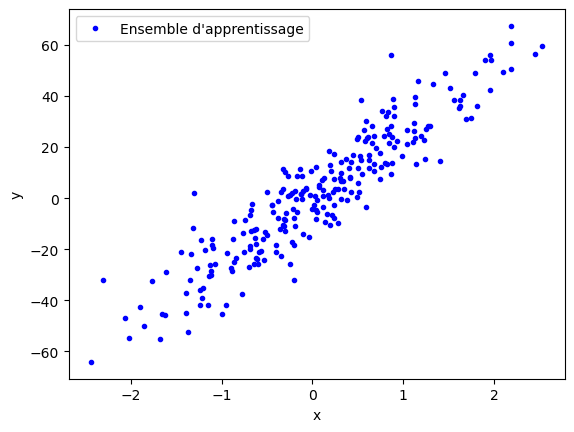

In [13]:
# Préparation des données
x, y = datasets.make_regression(n_samples=250, n_features=1, n_targets=1, random_state=1, noise=10)
y = np.expand_dims(y, 1)

plt.plot(x, y, 'b.', label='Ensemble d\'apprentissage')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

Observez le graphique : la dimension des espaces $x$ et $y$ vous permettra de déterminer le nombre de neurones à positionner en entrée et en sortie du perceptron monocouche pour résoudre ce problème.

**Pour résoudre un problème de régression, vous devez utiliser une fonction d'activation *linear* et l'erreur quadratique moyenne (mse) comme fonction de coût.**

Une fois ceci fait, le code ci-après affiche également la prédiction de votre modèle, ici une droite (affichée en vert) qui cherche à interpoler les données de l'ensemble d'apprentissage.

Epoch    0 : Loss 216.6618
Epoch    1 : Loss 93.8775
Epoch    2 : Loss 95.6949
Epoch    3 : Loss 93.6449
Epoch    4 : Loss 93.2614
Epoch    5 : Loss 92.0452
Epoch    6 : Loss 91.8134
Epoch    7 : Loss 94.1573
Epoch    8 : Loss 95.9175
Epoch    9 : Loss 89.3419


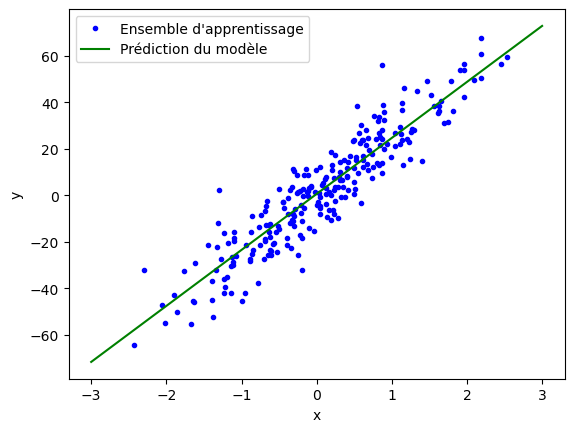

In [14]:
### A COMPLETER
model = DenseLayer(1, 1, 'linear')
model = SGD(x, y, model, 'mse', learning_rate=0.1, epochs=10, batch_size=20)
### FIN

plt.plot(x, y, 'b.', label='Ensemble d\'apprentissage')

plt.xlabel('x')
plt.ylabel('y')

x_gen = np.expand_dims(np.linspace(-3, 3, 10), 1)
y_gen = np.transpose(model.forward(np.transpose(x_gen)))

plt.plot(x_gen, y_gen, 'g-', label='Prédiction du modèle')
plt.legend()
plt.show()

### Test sur un problème de classification binaire

Afin de pouvoir tester notre perceptron mono-couche sur un problème de classification binaire (i.e. effectuer une régression logistique), il est d'abord nécessaire d'implémenter l'entropie croisée binaire.

$$ J_{mb} = \frac{1}{m  n_y} \sum_{i=1}^{n_y} \sum_{j=1}^{m} \left(-y_{ij}  log(\hat{y}_{ij}) - (1-y_{ij})  log(1-\hat{y}_{ij})\right) $$

et

$$ \frac{\partial J_{mb}}{\partial \hat{y}} = \frac{1}{m  n_y} \left(\frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}}\right)$$
      


In [15]:
### A COMPLETER
def binary_cross_entropy(y_true, y_pred):
  J_mb = (-y_true * np.log(y_pred) - (1-y_true)*np.log(1-y_pred)).mean()
  dy_hat = (-y_true / y_pred + (1-y_true) / (1-y_pred)) / (y_pred.shape[0] * y_pred.shape[1])

  return J_mb, dy_hat

In [16]:
np.random.seed(1)
y_true = np.random.rand(10,1)
y_true = np.where(y_true<0.5,0,1)

y_pred = np.random.rand(10,1)

J_mb, dy_hat = binary_cross_entropy(y_true, y_pred)
print("J_mb = ", J_mb)
print("dy_hat = \n", dy_hat)

J_mb =  0.7520974162532861
dy_hat = 
 [[ 0.17217468]
 [-0.14593864]
 [ 0.12569956]
 [ 0.8204619 ]
 [ 0.10281588]
 [ 0.30346021]
 [ 0.17161631]
 [ 0.22659799]
 [ 0.11633141]
 [-0.50479176]]


**Affichage attendu**:

```Python
J_mb =  0.7520974162532861
dy_hat =
 [[ 0.17217468]
 [-0.14593864]
 [ 0.12569956]
 [ 0.8204619 ]
 [ 0.10281588]
 [ 0.30346021]
 [ 0.17161631]
 [ 0.22659799]
 [ 0.11633141]
 [-0.50479176]]
 ```

Le bloc de code suivant permet de générer et d'afficher un ensemble de données pour un problème de classification binaire classique.

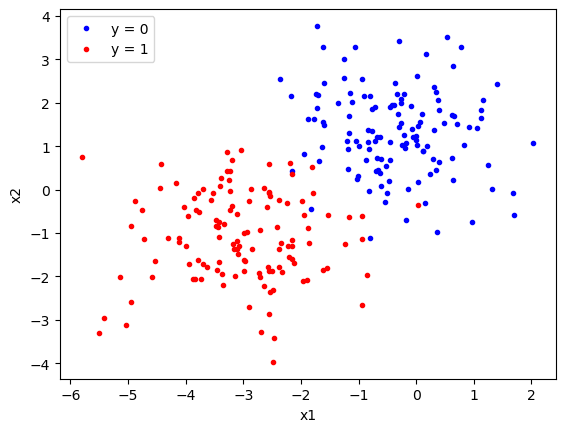

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

x, y = datasets.make_blobs(n_samples=250, n_features=2, centers=2, center_box=(- 3, 3), random_state=1)
y = np.expand_dims(y, 1)

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x[y[:,0]==0,0], x[y[:,0]==0,1], 'b.', label='y = 0')
plt.plot(x[y[:,0]==1,0], x[y[:,0]==1,1], 'r.', label='y = 1')

plt.legend()

plt.show()

A nouveau, vous devez déterminer le nombre de neurones à positionner en entrée et en sortie du perceptron monocouche pour résoudre ce problème.

**Pour ce problème de classification, vous devez utiliser une fonction d'activation sigmoide et une fonction de coût entropie croisée binaire.**

 Une fois ceci fait, le code ci-après affiche également la prédiction de votre modèle. **Vous venez d'implémenter une régression logistique !**

In [1]:
### A COMPLETER
model = DenseLayer(x.shape[1],y.shape[1], 'sigmoid')
model = SGD(x, y, model, 'bce', learning_rate=0.3, epochs=50, batch_size=20)
### FIN

plt.plot(x[y[:,0]==0,0], x[y[:,0]==0,1], 'b.', label='y = 0')
plt.plot(x[y[:,0]==1,0], x[y[:,0]==1,1], 'r.', label='y = 1')

plt.xlabel('x1')
plt.ylabel('x2')

x1_gen = np.linspace(-6, 2, 10)
x2_gen = -model.Wxy[0,0]*x1_gen/model.Wxy[0,1] - model.by[0,0]/model.Wxy[0,1]

plt.plot(x1_gen, x2_gen, 'g-')

plt.legend()

plt.show()

NameError: name 'DenseLayer' is not defined

## Test sur un problème de classification binaire plus complexe

Testons maintenant un problème de classification plus complexe :

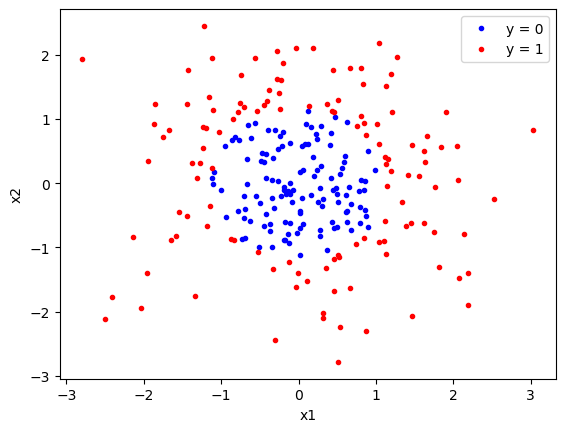

In [19]:
x, y = datasets.make_gaussian_quantiles(n_samples=250, n_features=2, n_classes=2, random_state=1)
y = np.expand_dims(y, 1)

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x[y[:,0]==0,0], x[y[:,0]==0,1], 'b.', label='y = 0')
plt.plot(x[y[:,0]==1,0], x[y[:,0]==1,1], 'r.', label='y = 1')

plt.legend()

plt.show()

Le code ci-dessous vous permettra d'afficher la frontière de décision établie par votre modèle :

In [20]:
def print_decision_boundaries(model, x, y):
  dx, dy = 0.1, 0.1
  y_grid, x_grid = np.mgrid[slice(-4, 4 + dy, dy),
                  slice(-4, 4 + dx, dx)]


  x_gen = np.concatenate((np.expand_dims(np.reshape(y_grid, (-1)),1),np.expand_dims(np.reshape(x_grid, (-1)),1)), axis=1)
  z_gen = model.forward(np.transpose(x_gen)).reshape(x_grid.shape)

  z_min, z_max = 0, 1

  c = plt.pcolor(x_grid, y_grid, z_gen, cmap='RdBu', vmin=z_min, vmax=z_max)
  plt.colorbar(c)
  plt.plot(x[y==0,0], x[y==0,1], 'r.')
  plt.plot(x[y==1,0], x[y==1,1], 'b.')
  plt.show()

Complétez le code ci-dessous :

Epoch    0 : Loss 0.7682
Epoch    1 : Loss 0.7022
Epoch    2 : Loss 0.6897
Epoch    3 : Loss 0.6912
Epoch    4 : Loss 0.6910
Epoch    5 : Loss 0.6883
Epoch    6 : Loss 0.6914
Epoch    7 : Loss 0.6906
Epoch    8 : Loss 0.6913
Epoch    9 : Loss 0.6889
Epoch   10 : Loss 0.6921
Epoch   11 : Loss 0.6908
Epoch   12 : Loss 0.6859
Epoch   13 : Loss 0.6911
Epoch   14 : Loss 0.6917
Epoch   15 : Loss 0.6930
Epoch   16 : Loss 0.6884
Epoch   17 : Loss 0.6897
Epoch   18 : Loss 0.6908
Epoch   19 : Loss 0.6904
Epoch   20 : Loss 0.6928
Epoch   21 : Loss 0.6906
Epoch   22 : Loss 0.6877
Epoch   23 : Loss 0.6912
Epoch   24 : Loss 0.6897
Epoch   25 : Loss 0.6904
Epoch   26 : Loss 0.6925
Epoch   27 : Loss 0.6910
Epoch   28 : Loss 0.6914
Epoch   29 : Loss 0.6911
Epoch   30 : Loss 0.6922
Epoch   31 : Loss 0.6897
Epoch   32 : Loss 0.6893
Epoch   33 : Loss 0.6913
Epoch   34 : Loss 0.6898
Epoch   35 : Loss 0.6935
Epoch   36 : Loss 0.6899
Epoch   37 : Loss 0.6923
Epoch   38 : Loss 0.6940
Epoch   39 : Loss 0.6924


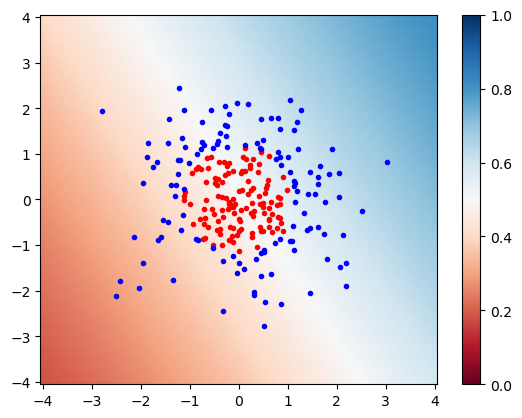

In [21]:
### A COMPLETER
model = DenseLayer(x.shape[1], y.shape[1], 'sigmoid')
model = SGD(x, y, model, 'bce', learning_rate=0.3, epochs=50, batch_size=20)
### FIN

print_decision_boundaries(model, x, y[:,0])

Cette fois-ci il n'est pas possible de faire résoudre un problème aussi "complexe" à notre simple perceptron monocouche. Nous allons pour cela devoir passer au perceptron multi-couches !

---

# Perceptron multi-couches

## Implémentation du perceptron multi-couches

A partir du perceptron mono-couche créé précédemment, nous pouvons maintenant implémenter un perceptron multi-couches, qui est un véritable réseau de neurones dans la mesure où il met en jeu plusieurs couches de neurones successives. **Concrètement, le perceptron multi-couches est une composition de perceptron monocouches**, chacun prenant en entrée l'activation de sortie de la couche précédente. Prenons l'exemple ci-dessous :

<img src="https://drive.google.com/uc?id=1ILboVqVVwy71lqAwM3ZGm6umCQegvmuV" height=350>


Ce perceptron multi-couches est la composition de deux perceptrons monocouches, le premier liant deux neurones d'entrée à deux neurones de sortie, et le second deux neurones d'entrée à un neurone de sortie.

<img src="https://drive.google.com/uc?id=1hyrrsf8ZpqUcy2_T89HbQX7fpmqtbNwa" height=350>

Voici comment nous l'implémenterons : le perceptron multi-couches consiste simplement en une liste de perceptrons monocouches (*DenseLayer*). A l'initialisation, le perceptron multi-couches est une liste vide, dans laquelle il est possible d'ajouter des couches denses (fonction *add_layer()*).

```python
model = MultiLayerPerceptron()
model.add_layer(DenseLayer(2, 2, 'relu'))
model.add_layer(DenseLayer(2, 1, 'sigmoid'))
```

La fonction *forward()* du perceptron multi-couches consiste en le calcul successif de la sortie des couches denses. Chaque couche dense effectue une prédiction sur la sortie de la couche dense précédente.

La fonction *backward()* implémente l'algorithme de rétro-propagation du gradient. Les gradients des paramètres de la dernière couche sont calculés en premier, et sont utilisés pour calculer les gradients de la couche précédente, comme illustré sur cette figure.

<img src="https://drive.google.com/uc?id=1KVH0DWbAwT7R6-XmpqmpWob1jqftqC84" height=350>

In [80]:
class MultiLayerPerceptron:
    def __init__(self):
      # Initialisation de la liste de couches du perceptron multi-couches à la liste vide
      self.layers = []

    # Fonction permettant d'ajouter la couche passée en paramètre dans la liste de couches
    # du perceptron multi-couches
    def add_layer(self, layer):
      self.layers.append(layer)

    # Fonction réalisant la prédiction du perceptron multi-couches :
    # Elle consiste en la prédiction successive de chacune des couches de la liste de couches,
    # chacune prenant en entrée la prédiction de la couche précédente
    def forward(self, x_batch):
      previous_pred = x_batch
      for i in range(len(self.layers)):
        previous_pred = self.layers[i].forward(previous_pred)

      return previous_pred

    # Fonction de calcul des gradients de la fonction objectif par rapport à chaque paramètre
    # du perceptron multi-couches
    # L'entrée dy_hat correspond au gradient de la fonction objectif par rapport à la prédiction
    # finale du perceptron multi-couches (notée dJ/dŷ sur la figure précédente)
    # Cette fonction doit implémenter la rétropropagation du gradient : on parcourt la liste des
    # couches en sens inverse (fonction reversed) et le gradient de la fonction objectif par rapport
    # à l'entrée d'une couche est utilisé pour calculer les gradients de la couche précédente
    #
    # Cette fonction retourne une liste de dictionnaires de gradients, de même dimension que le nombre
    # de couches
    def backward(self, dy_hat):
      gradients = []
      for i in reversed(range(len(self.layers))):
        gradient_layer = self.layers[i].backward(dy_hat)
        dy_hat = gradient_layer['dx']
        gradients.append(gradient_layer)
      gradients.reverse()
      return gradients

    # Fonction de mise à jour des paramètres en fonction des gradients établis dans la
    # fonction backward et d'un taux d'apprentissage
    def update_parameters(self, gradients, learning_rate):
      for i in range(len(self.layers)):
        self.layers[i].update_parameters(gradients[i], learning_rate)

## Test sur le problème plus complexe de classification binaire

Vous pouvez maintenant tester votre perceptron multi-couches sur le problème précédent. Deux couches suffisent pour résoudre le problème !

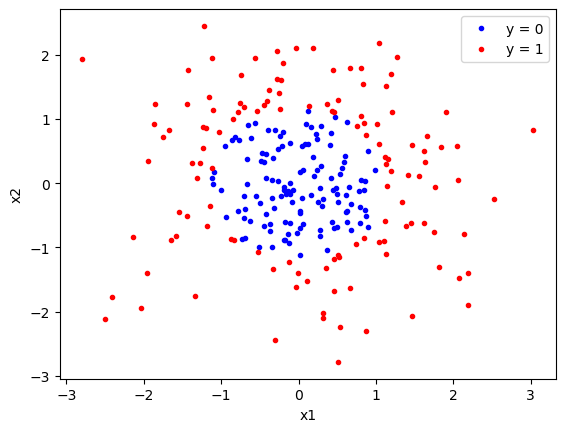

In [81]:
x, y = datasets.make_gaussian_quantiles(n_samples=250, n_features=2, n_classes=2, random_state=1)
y = np.expand_dims(y, 1)

plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x[y[:,0]==0,0], x[y[:,0]==0,1], 'b.', label='y = 0')
plt.plot(x[y[:,0]==1,0], x[y[:,0]==1,1], 'r.', label='y = 1')

plt.legend()

plt.show()

Epoch    0 : Loss 0.6342
Epoch    1 : Loss 0.5719
Epoch    2 : Loss 0.5104
Epoch    3 : Loss 0.4673
Epoch    4 : Loss 0.4260
Epoch    5 : Loss 0.3800
Epoch    6 : Loss 0.3489
Epoch    7 : Loss 0.3238
Epoch    8 : Loss 0.2994
Epoch    9 : Loss 0.2806
Epoch   10 : Loss 0.2698
Epoch   11 : Loss 0.2565
Epoch   12 : Loss 0.2380
Epoch   13 : Loss 0.2249
Epoch   14 : Loss 0.2117
Epoch   15 : Loss 0.2101
Epoch   16 : Loss 0.1999
Epoch   17 : Loss 0.2004
Epoch   18 : Loss 0.1848
Epoch   19 : Loss 0.1781
Epoch   20 : Loss 0.1785
Epoch   21 : Loss 0.1660
Epoch   22 : Loss 0.1693
Epoch   23 : Loss 0.1667
Epoch   24 : Loss 0.1612
Epoch   25 : Loss 0.1573
Epoch   26 : Loss 0.1525
Epoch   27 : Loss 0.1482
Epoch   28 : Loss 0.1509
Epoch   29 : Loss 0.1485
Epoch   30 : Loss 0.1348
Epoch   31 : Loss 0.1424
Epoch   32 : Loss 0.1377
Epoch   33 : Loss 0.1347
Epoch   34 : Loss 0.1372
Epoch   35 : Loss 0.1337
Epoch   36 : Loss 0.1291
Epoch   37 : Loss 0.1246
Epoch   38 : Loss 0.1301
Epoch   39 : Loss 0.1241


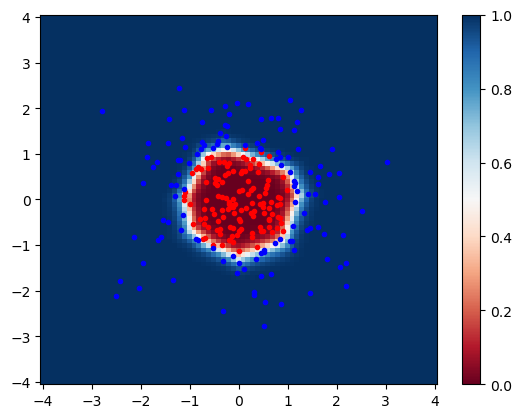

In [82]:
model = MultiLayerPerceptron()
model.add_layer(DenseLayer(2, 10, 'relu'))
model.add_layer(DenseLayer(10, 1, 'sigmoid'))

model = SGD(x, y, model, 'bce', learning_rate=0.3, epochs=60, batch_size=20)

print_decision_boundaries(model, x, y[:,0])

# Quelques exercices supplémentaires (complètement facultatifs !)

## Evanescence du gradient

Testez le réseau suivant sur le problème simple de classification binaire évoqué dans la partie précédente :
```python
model.add_layer(DenseLayer(2, 10, 'sigmoid'))
model.add_layer(DenseLayer(10, 10, 'sigmoid'))
model.add_layer(DenseLayer(10, 10, 'sigmoid'))
model.add_layer(DenseLayer(10, 10, 'sigmoid'))
model.add_layer(DenseLayer(10, 1, 'sigmoid'))
```



1.   Qu'observez-vous ?
2.   Comment résoudre ce problème ?




## Application à un problème de classification d'image


Le code ci-dessous vous permet de charger l'ensemble de données CIFAR-10 qui regroupe des imagettes de taille $32 \times 32$ représentant 10 types d'objets différents.

Des images de chat et de chien sont extraites de cet ensemble : à vous de mettre en place un perceptron multi-couches de classification binaire pour apprendre à reconnaître un chien d'un chat dans une image.

In [2]:
import tensorflow as tf

# Récupération des données
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# La base de données CIFAR contient des images issues de 10 classes :
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

# Préparation des données pour la classification binaire :

# Extraction des images des classes de chat et chien
indices_train = np.squeeze(y_train)
x_cat_train = x_train[indices_train==3,:]
x_dog_train = x_train[indices_train==5,:]

indices_test = np.squeeze(y_test)
x_cat_test = x_test[indices_test==3,:]
x_dog_test = x_test[indices_test==5,:]

# Création des données d'apprentissage et de test
# Les images sont redimensionnées en vecteurs de dimension 3072 (32*32*3)
# On assigne 0 à la classe chat et 1 à la classe chien
x_train = np.concatenate((np.resize(x_cat_train[0:250],(250, 32*32*3)), np.resize(x_dog_train[0:250],(250, 32*32*3))), axis=0)
y_train = np.expand_dims(np.concatenate((np.zeros((250)), np.ones((250))),axis=0),1)

x_test = np.concatenate((np.resize(x_cat_test,(1000, 32*32*3)), np.resize(x_dog_test,(1000, 32*32*3))), axis=0)
y_test = np.expand_dims(np.concatenate((np.zeros((1000)), np.ones((1000))),axis=0),1)

# Normalisation des entré$es
x_train = x_train/255
x_test = x_test/255


2024-03-14 10:57:53.042514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'tree'

In [ ]:
# A COMPLETER
model = MultiLayerPerceptron()
model.add_layer(DenseLayer(..., ..., ...))
...
# A vous de tester le nombre de couches qui vous semble adéquat

model = SGD(x_train, y_train, model, ..., learning_rate=0.03, epochs=10, batch_size=10)

In [ ]:
# Prédiction du modèle sur les données de test
y_pred_test = np.transpose(model.forward(np.transpose(x_test)))

# Calcul de la précision : un écart inférieur à 0.5 entre prédiction et label
#  est considéré comme bonne prédiction
prediction_eval = np.where(np.abs(y_pred_test-y_test)<0.5, 1, 0)
overall_test_precision = 100*np.sum(prediction_eval)/y_test.shape[0]
print(f"Précision de {overall_test_precision:2.1f} %")

Si vous obtenez une précision supérieure à 50%, votre réseau est meilleur qu'une prédiction aléatoire, ce qui est déjà bien ! Notez qu'ici nous avons circonscrit l'ensemble d'apprentissage à 500 échantillons (250 de chaque classe) car les calculs de produit matriciel sont longs. C'est tout l'intérêt de porter les calculs sur GPU ou TPU, des dispositifs matériels spécialement conçus et optimisés pour paralléliser ces calculs.